**The correlation of heart health and gender: a review of medical data this lead to?**

*Introduction*

Our study aims to explore the identification of gender in patients with heart disease, recognizing the biological differences between male and female patients that could affect the normal ranges of various predictors. Utilizing the K-nearest neighbors classification method, we intend to predict a patient's gender based on a subset of variables from the heart disease dataset. These variables include disease classification, cholesterol levels, resting electrocardiogram (ECG) results, and maximum heart rate achieved. While the heart disease dataset encompasses a broad range of variables, our analysis will focus exclusively on these selected predictors. There will also be 303 instances of data to be used for both training and testing our data

Citation:
Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

*Exploratory Data Analysis*

In [6]:
library(repr)
library(tidyverse)
library(rvest)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [7]:
url <- "https://raw.githubusercontent.com/victoriachoi7/group-4-dsci/main/processed.cleveland.data"
cleveland_data <- read_csv(url, col_names = FALSE)
colnames(cleveland_data) <- c("age", "sex", "chest_pain_type", "resting_bp", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

cleveland_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain_type,resting_bp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [8]:
cleveland_wrangled <-cleveland_data|>
            select("sex", "num", "chol", "restecg", "thalach")|>
            mutate(sex = as_factor(sex))      
cleveland_wrangled

sex,num,chol,restecg,thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,233,2,150
1,2,286,2,108
1,1,229,2,129
⋮,⋮,⋮,⋮,⋮
1,3,131,0,115
0,1,236,2,174
1,0,175,0,173


In [9]:
set.seed(12345)
cleveland_split <- initial_split(cleveland_wrangled, prop = 0.75, strata = sex)
cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)
cleveland_training
cleveland_testing

sex,num,chol,restecg,thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,204,2,172
0,3,268,2,160
0,0,354,0,163
⋮,⋮,⋮,⋮,⋮
1,3,176,2,90
1,2,193,0,141
1,3,131,0,115


sex,num,chol,restecg,thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,286,2,108
0,0,294,2,153
0,0,283,2,162
⋮,⋮,⋮,⋮,⋮
0,1,241,0,123
1,1,264,0,132
1,0,175,0,173


In [10]:
cleveland_sum <- cleveland_wrangled |>
        group_by(sex)|>
        summarize(average_chol = mean(chol), num_median = median(num), restecg_median = median(restecg))
cleveland_sum
#was trying to find out how to get the averages for each obs but realized that the disease can't really have a decimal value?

sex,average_chol,num_median,restecg_median
<fct>,<dbl>,<dbl>,<dbl>
0,261.7526,0,0.0
1,239.6019,1,1.5


In [11]:
cleveland_obs <- cleveland_training |>
        group_by(sex)|>
        summarize(count = n())
cleveland_obs
#wasnt sure how to get number of obs for each column

sex,count
<fct>,<int>
0,72
1,154


In [12]:
cleveland_missing <- sum(is.na(cleveland_training))
cleveland_missing
#wanted to add this to the above table, but above table wasn't working so this is it for now

[1] 0

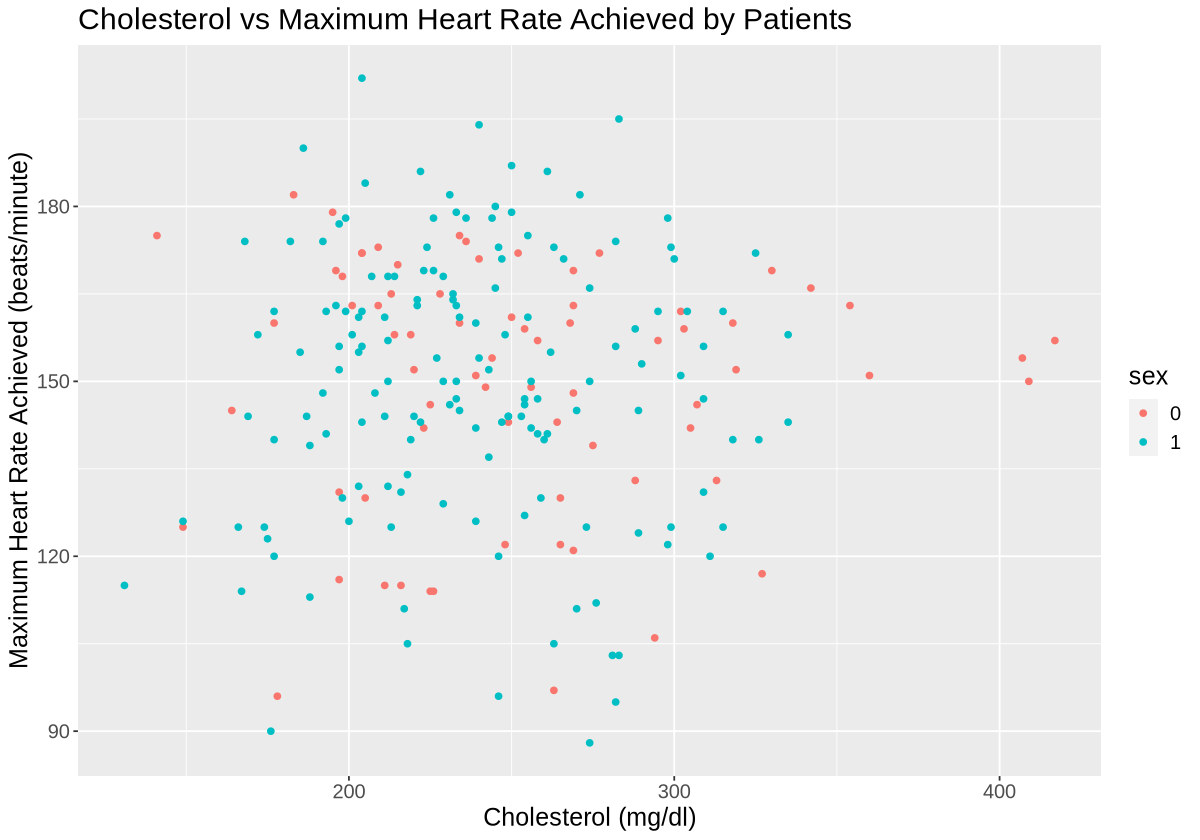

In [13]:
#Here's a graph tho cause ik how to do that at least
options(repr.plot.width = 10, repr.plot.height = 7)
cleveland_viz <- cleveland_training|>
        ggplot(aes(x = chol, y = thalach, colour = sex)) +
            geom_point()+
            labs(x = "Cholesterol (mg/dl)",
                 y = "Maximum Heart Rate Achieved (beats/minute)",
                 colour = "sex")+
        ggtitle("Cholesterol vs Maximum Heart Rate Achieved by Patients")+
        theme(text = element_text(size = 15))
cleveland_viz
#haha this graph is random i dont think theres any relation

*Methods*

We will take the data and clean it up before splitting it into two distinct groups with the following columns cholestoral, resting ECG, max heart rate, disease classification, and gender. From here we will set up a K nearest neighbor analysis and attempt to predict gender based on the heart condition and the factors listed above. If we find no correlation then we will move on to using the same conditions to attempt to classify the disease. So that we have sufficient material to reflect on and draw conclusions from.

*Expected outcomes and significance*

We expect to be successful to moderate accuracy in classifying gender based on the other factors. If it is possible to predict gender based on these factors it may lead to more personalized treatment to help manage and prevent these conditions. This could lead to further research to determine safe levels for the factors by gender to help medical professionals give better advice and care.